# Proyecto de Clasificador de Vinos con KNN de Luisa

In [44]:
import pandas as pd

# Cargar el archivo CSV desde la URL
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", delimiter=';')

# Mostrar las primeras 5 filas
print("Primeras 5 filas:")
print(df.head())

# Mostrar la forma del DataFrame (filas, columnas)
print("\nForma del DataFrame:")
print(df.shape)

# Mostrar los tipos de datos de cada columna
print("\nTipos de datos de cada columna:")
print(df.dtypes)

# Verificar si hay valores nulos
print("\nVerificar valores nulos en el DataFrame:")
print(df.isnull().sum())

# Obtener estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar las columnas del DataFrame
print("\nNombres de las columnas:")
print(df.columns)

Primeras 5 filas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2 

In [49]:
# Separar las variables independientes (X) del objetivo (y)
X = df.drop('quality', axis=1)  # Las columnas de características
y = df['quality']  # La columna objetivo


In [50]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos (muy recomendable con KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar el modelo KNN con un valor de k inicial (por ejemplo, k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [54]:
from sklearn.metrics import accuracy_score

# Calcular la precisión (accuracy) del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {accuracy * 100:.2f}%")


Precisión del modelo KNN: 54.69%


In [55]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(cm)



Matriz de Confusión:
[[ 0  0  0  1  0  0]
 [ 0  0  4  6  0  0]
 [ 0  2 88 40  0  0]
 [ 1  0 49 72 10  0]
 [ 0  0  7 20 15  0]
 [ 0  0  1  1  3  0]]


In [56]:
from sklearn.metrics import classification_report

# Calcular el reporte de clasificación
report = classification_report(y_test, y_pred)
print("\nReporte de Clasificación:")
print(report)



Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.68      0.63       130
           6       0.51      0.55      0.53       132
           7       0.54      0.36      0.43        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.27      0.26      0.26       320
weighted avg       0.52      0.55      0.53       320



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El modelo KNN presenta una precisión de 54.69%, lo que indica que solo aproximadamente la mitad de las predicciones fueron correctas, un rendimiento relativamente bajo. La matriz de confusión muestra que el modelo tiene dificultades para predecir correctamente varias clases, especialmente las de menor frecuencia (como las clases 3, 4 y 8), ya que estas tienen una gran cantidad de ceros en la diagonal, lo que significa que no fueron predichas adecuadamente. El reporte de clasificación revela que el modelo tiene un buen desempeño en las clases 5 y 6, con valores de precisión y recall decentes, pero las clases 3, 4 y 8 tienen una precisión de 0.00, lo que sugiere que el modelo no predice correctamente estas clases.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lista para almacenar las precisiones de cada k
accuracies = []

# Bucle para probar diferentes valores de k (de 1 a 20)
for k in range(1, 21):
    # Crear el modelo KNN con el valor de k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    knn.fit(X_train_scaled, y_train)
    
    # Hacer predicciones
    y_pred = knn.predict(X_test_scaled)
    
    # Calcular la precisión (accuracy)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Guardar el resultado
    accuracies.append(accuracy)


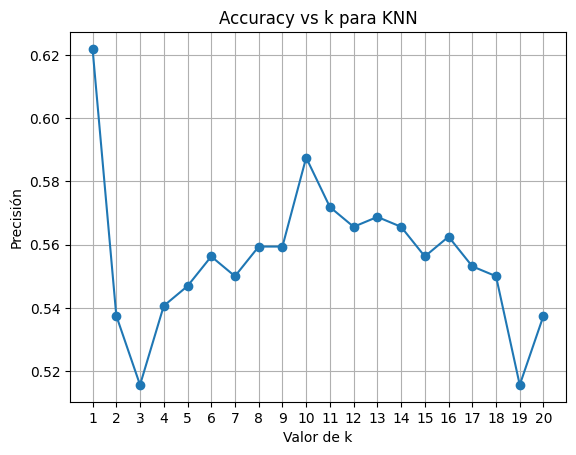

In [60]:
import matplotlib.pyplot as plt
# Graficar accuracy vs k
plt.plot(range(1, 21), accuracies, marker='o')
plt.title('Accuracy vs k para KNN')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

El gráfico muestra la relación entre el valor de k y la precisión del modelo KNN, con fluctuaciones notables en diferentes valores de k. Se observa que para k = 1, la precisión es sorprendentemente baja, lo que podría ser un indicio de sobreajuste o ruido en las predicciones. Sin embargo, la precisión aumenta significativamente en k = 2 y se mantiene relativamente estable en valores más altos de k, alcanzando su punto máximo alrededor de k = 9 o k = 10, donde la precisión alcanza aproximadamente 0.62. Posteriormente, la precisión disminuye en valores mayores de k, lo que sugiere que el modelo comienza a perder capacidad predictiva al considerar demasiados vecinos, lo que puede diluir la influencia de vecinos cercanos más relevantes. En resumen, parece que un valor de k entre 9 y 10 podría ser el óptimo para este conjunto de datos.

In [62]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# Función para predecir la calidad del vino
def predict_wine_quality(features):
    # características sean un array de numpy
    features = np.array(features).reshape(1, -1)

    # Escalar las características utilizando el mismo scaler utilizado para entrenar
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Crear el modelo KNN con k = 10 (o el valor óptimo que hayas encontrado)
    knn = KNeighborsClassifier(n_neighbors=10)

    # Entrenar el modelo con las características y las etiquetas (usando datos previos)
    knn.fit(X_train_scaled, y_train)

    # Predecir la clase (calidad del vino)
    prediction = knn.predict(features_scaled)
    
    # Mapear la predicción a un mensaje interpretativo
    if prediction == 3:
        return "Este vino probablemente sea de calidad baja 🍷"
    elif prediction == 4:
        return "Este vino probablemente sea de calidad baja 🍷"
    elif prediction == 5:
        return "Este vino probablemente sea de calidad media 🍷"
    elif prediction == 6:
        return "Este vino probablemente sea de calidad media 🍷"
    elif prediction == 7:
        return "Este vino probablemente sea de buena calidad 🍷"
    elif prediction == 8:
        return "Este vino probablemente sea de excelente calidad 🍷"
    else:
        return "No se puede determinar la calidad del vino con certeza 🍷"


print(predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]))


Este vino probablemente sea de calidad media 🍷
